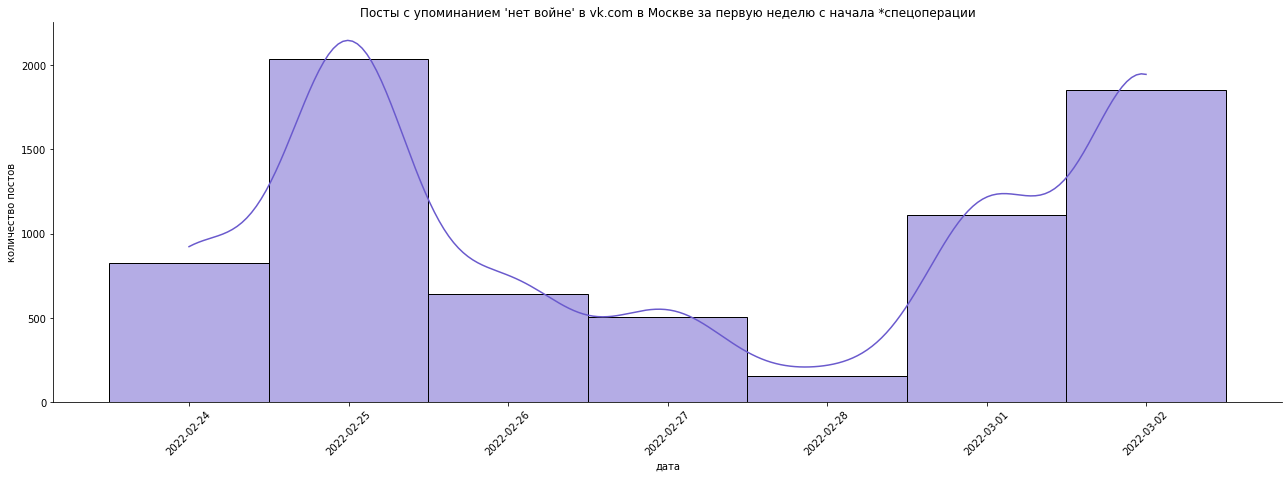

In [19]:
import json
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import re

data_for_analysis_1 = pd.DataFrame()
with open('key_words_data.json', 'r') as file:
    for line in file:      
        data = json.loads(line)
        df = pd.json_normalize(data)
        data_for_analysis_1 = pd.concat([data_for_analysis_1, df], sort = False, axis = 0)

def ts2dt(ts):
  return dt.datetime.fromtimestamp(ts)

def get_date_only(dt):
  return dt.date()

data_for_analysis_1['date'] = data_for_analysis_1['date'].apply(ts2dt)
data_for_analysis_1['date'] = data_for_analysis_1['date'].apply(get_date_only)
        
plot = sns.displot(data_for_analysis_1["date"], discrete=True, kde=True, height=6, aspect=3, color="slateblue")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.xticks(ticks=pd.date_range(start=data_for_analysis_1["date"].min(), end=data_for_analysis_1["date"].max(), periods=7), rotation=45)
plt.title("Посты с упоминанием 'нет войне' в vk.com в Москве за первую неделю с начала *спецоперации")
plt.xlabel("дата")
plt.ylabel("количество постов")
plt.show()


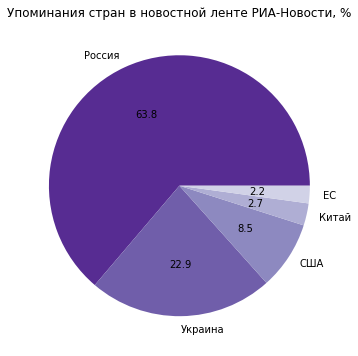

In [20]:
data_for_analysis_2 = pd.DataFrame()
with open('wall.json', 'r', encoding='utf-8') as file:        
   for line in file:      
        data = json.loads(line)
        df = pd.json_normalize(data)
        data_for_analysis_2 = pd.concat([data_for_analysis_2, df], sort = False, axis = 0)

def search_countries(text):
    if re.search('Росси[ауоыиэяюёей]{1,2}[^а-я]', text):
        return "Россия"
    elif re.search('Украин[ауоыиэяюёей]{1,2}[^а-я]', text):
        return "Украина"
    if "США" in text:
        return "США" 
    elif re.search('Кита[^ц]{1,2}[^а-я]', text) or "КНР" in text:
        return "Китай"
    elif "ЕС " in text or "Евросоюз" in text or re.search('Евросоюз[а-я]{1,2}[^а-я]', text):
      return "ЕС"
    
data_for_analysis_2["text"] = data_for_analysis_2["text"].apply(search_countries)
mentioned_countries = data_for_analysis_2["text"].value_counts()

plt.figure(figsize=(10, 6))
colors = sns.color_palette('Purples_r')
plt.title("Упоминания стран в новостной ленте РИА-Новости, %")
plt.pie(mentioned_countries.values, labels=['Россия', 'Украина', 'США', 'Китай', 'ЕС'], \
    colors = colors, autopct='%.1f')
plt.show()


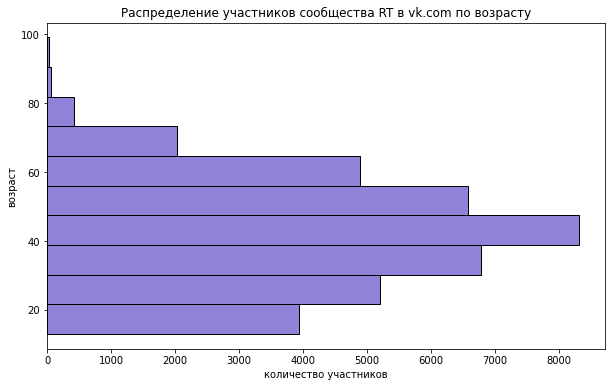

In [22]:
data_for_analysis_3 = pd.DataFrame()
with open('members.json', 'r') as file:
    for line in file:      
        data = json.loads(line)
        df = pd.json_normalize(data)
        data_for_analysis_3 = pd.concat([data_for_analysis_3, df], sort = False, axis = 0)

data_for_analysis_3["bdate"] = data_for_analysis_3["bdate"].astype(str)

def get_age(bdate):
    if len(bdate) > 6:
        age = dt.date.today() - dt.datetime.strptime(bdate, '%d.%m.%Y').date()
        return int(age.days // 365)
    else:
        None
data_for_analysis_3["bdate"] = data_for_analysis_3["bdate"].apply(get_age)
data_for_analysis_3 = data_for_analysis_3.loc[data_for_analysis_3["bdate"] < 100]

plt.figure(figsize=(10, 6))
plt.title("Распределение участников сообщества RT в vk.com по возрасту")
plt.xlabel("количество участников")
plt.ylabel("возраст")
sns.histplot(y="bdate", data=data_for_analysis_3, color="slateblue", bins=10)
plt.show()